In [1]:
#import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_alarm = pd.read_excel("C:/Users/mm598h/Documents/Daily Alarms/GA_Alarm_04062022.xlsx")

In [4]:
df_alarm.rename(columns = {'NodeName':'NodeId'}, inplace = True)

In [5]:
df_disabled = pd.read_excel("C:/Users/mm598h/Documents/Daily Alarms/GA_DiasbledCells_04062022.xlsx")

In [6]:
df_geoOwner = pd.read_excel("C:/Users/mm598h/Documents/Daily Alarms/Geo_Owner.xlsx")

In [7]:
df_Nodeid_tac = df_disabled[['NodeId', 'tac']]

In [8]:
df_Nodeid_tac= df_Nodeid_tac.drop_duplicates(subset = ["NodeId"])

In [9]:
df_alarm = df_alarm.assign(result=df_alarm['NodeId'].isin(df_disabled['NodeId']).astype(int))

In [10]:
df_alarm.drop(df_alarm[df_alarm['result'] == 0].index, inplace = True)

In [11]:
df_alarm.pop("result")

55      1
74      1
91      1
92      1
189     1
       ..
1178    1
1179    1
1183    1
1184    1
1188    1
Name: result, Length: 230, dtype: int32

In [12]:
df_alarm['tac'] = df_alarm['NodeId'].map(df_Nodeid_tac.set_index('NodeId')['tac'])

In [13]:
df_filtered_sp = df_alarm.loc[df_alarm['specificProblem'].isin(['General HW Error', 'Resource Allocation Failure', 'Resource Activation Timeout', 'Service Unavailable', 'Heartbeat Failure'])]

In [14]:
df_filtered_sp=df_filtered_sp.drop_duplicates()

In [15]:
output = df_filtered_sp.merge(df_geoOwner, on='tac', how='outer')

In [16]:
output = output.dropna(subset=['presentSeverity', 'NodeId'])

In [17]:
output = output.drop(["repeatCount","commentTime","visibility","fmxGenerated","processingType","eventPoId","additionalInformation","backupObjectInstance","backupStatus","trendIndication","proposedRepairAction","ceaseOperator","ackTime","ackOperator","problemDetail","commentText","RNC Name","RNCs","Secondary Engineer","Manager","Area","System View"], axis = 1)

# export file to excel

In [18]:
output.to_excel(r'C:\Users\mm598h\Downloads\SpecificProblem_04062022.xlsx',index = False)

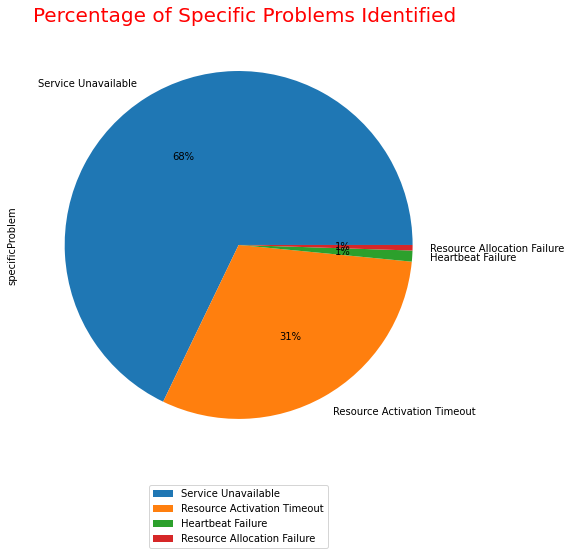

In [19]:
output['specificProblem'].value_counts().plot(kind='pie', figsize=(10,8), autopct='%1.0f%%')
plt.title('Percentage of Specific Problems Identified',loc='right',color='r', fontsize=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.04))
